In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

# For time stamps
from datetime import datetime

# Getting dataframes info for Stocks using yfinance
start_date = '2014-01-01'
end_date = '2024-12-31'

aapl = yf.download('AAPL', start=start_date, end=end_date)
msft = yf.download('MSFT', start=start_date, end=end_date)  
nvda = yf.download('NVDA', start=start_date, end=end_date)   
amzn = yf.download('AMZN', start=start_date, end=end_date)
goog = yf.download('GOOG', start=start_date, end=end_date)
meta = yf.download('META', start=start_date, end=end_date)
tsla = yf.download('TSLA', start=start_date, end=end_date) 
sp500 = yf.download('^GSPC', start=start_date, end=end_date)

list_stocks = [aapl, msft, nvda, amzn, goog, meta, tsla, sp500]

print('\n✅ Set up complete!')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



✅ Set up complete!


In [64]:
# Example data aapl
aapl

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2014-01-02,17.215364,17.336747,17.180818,17.294730,234684800
2014-01-03,16.837221,17.233112,16.820102,17.206969,392467600
2014-01-06,16.929035,17.018359,16.607529,16.727355,412610800
2014-01-07,16.807962,16.992213,16.741981,16.941171,317209200
2014-01-08,16.914404,16.979762,16.765945,16.769678,258529600
...,...,...,...,...,...
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700


### Closing Price

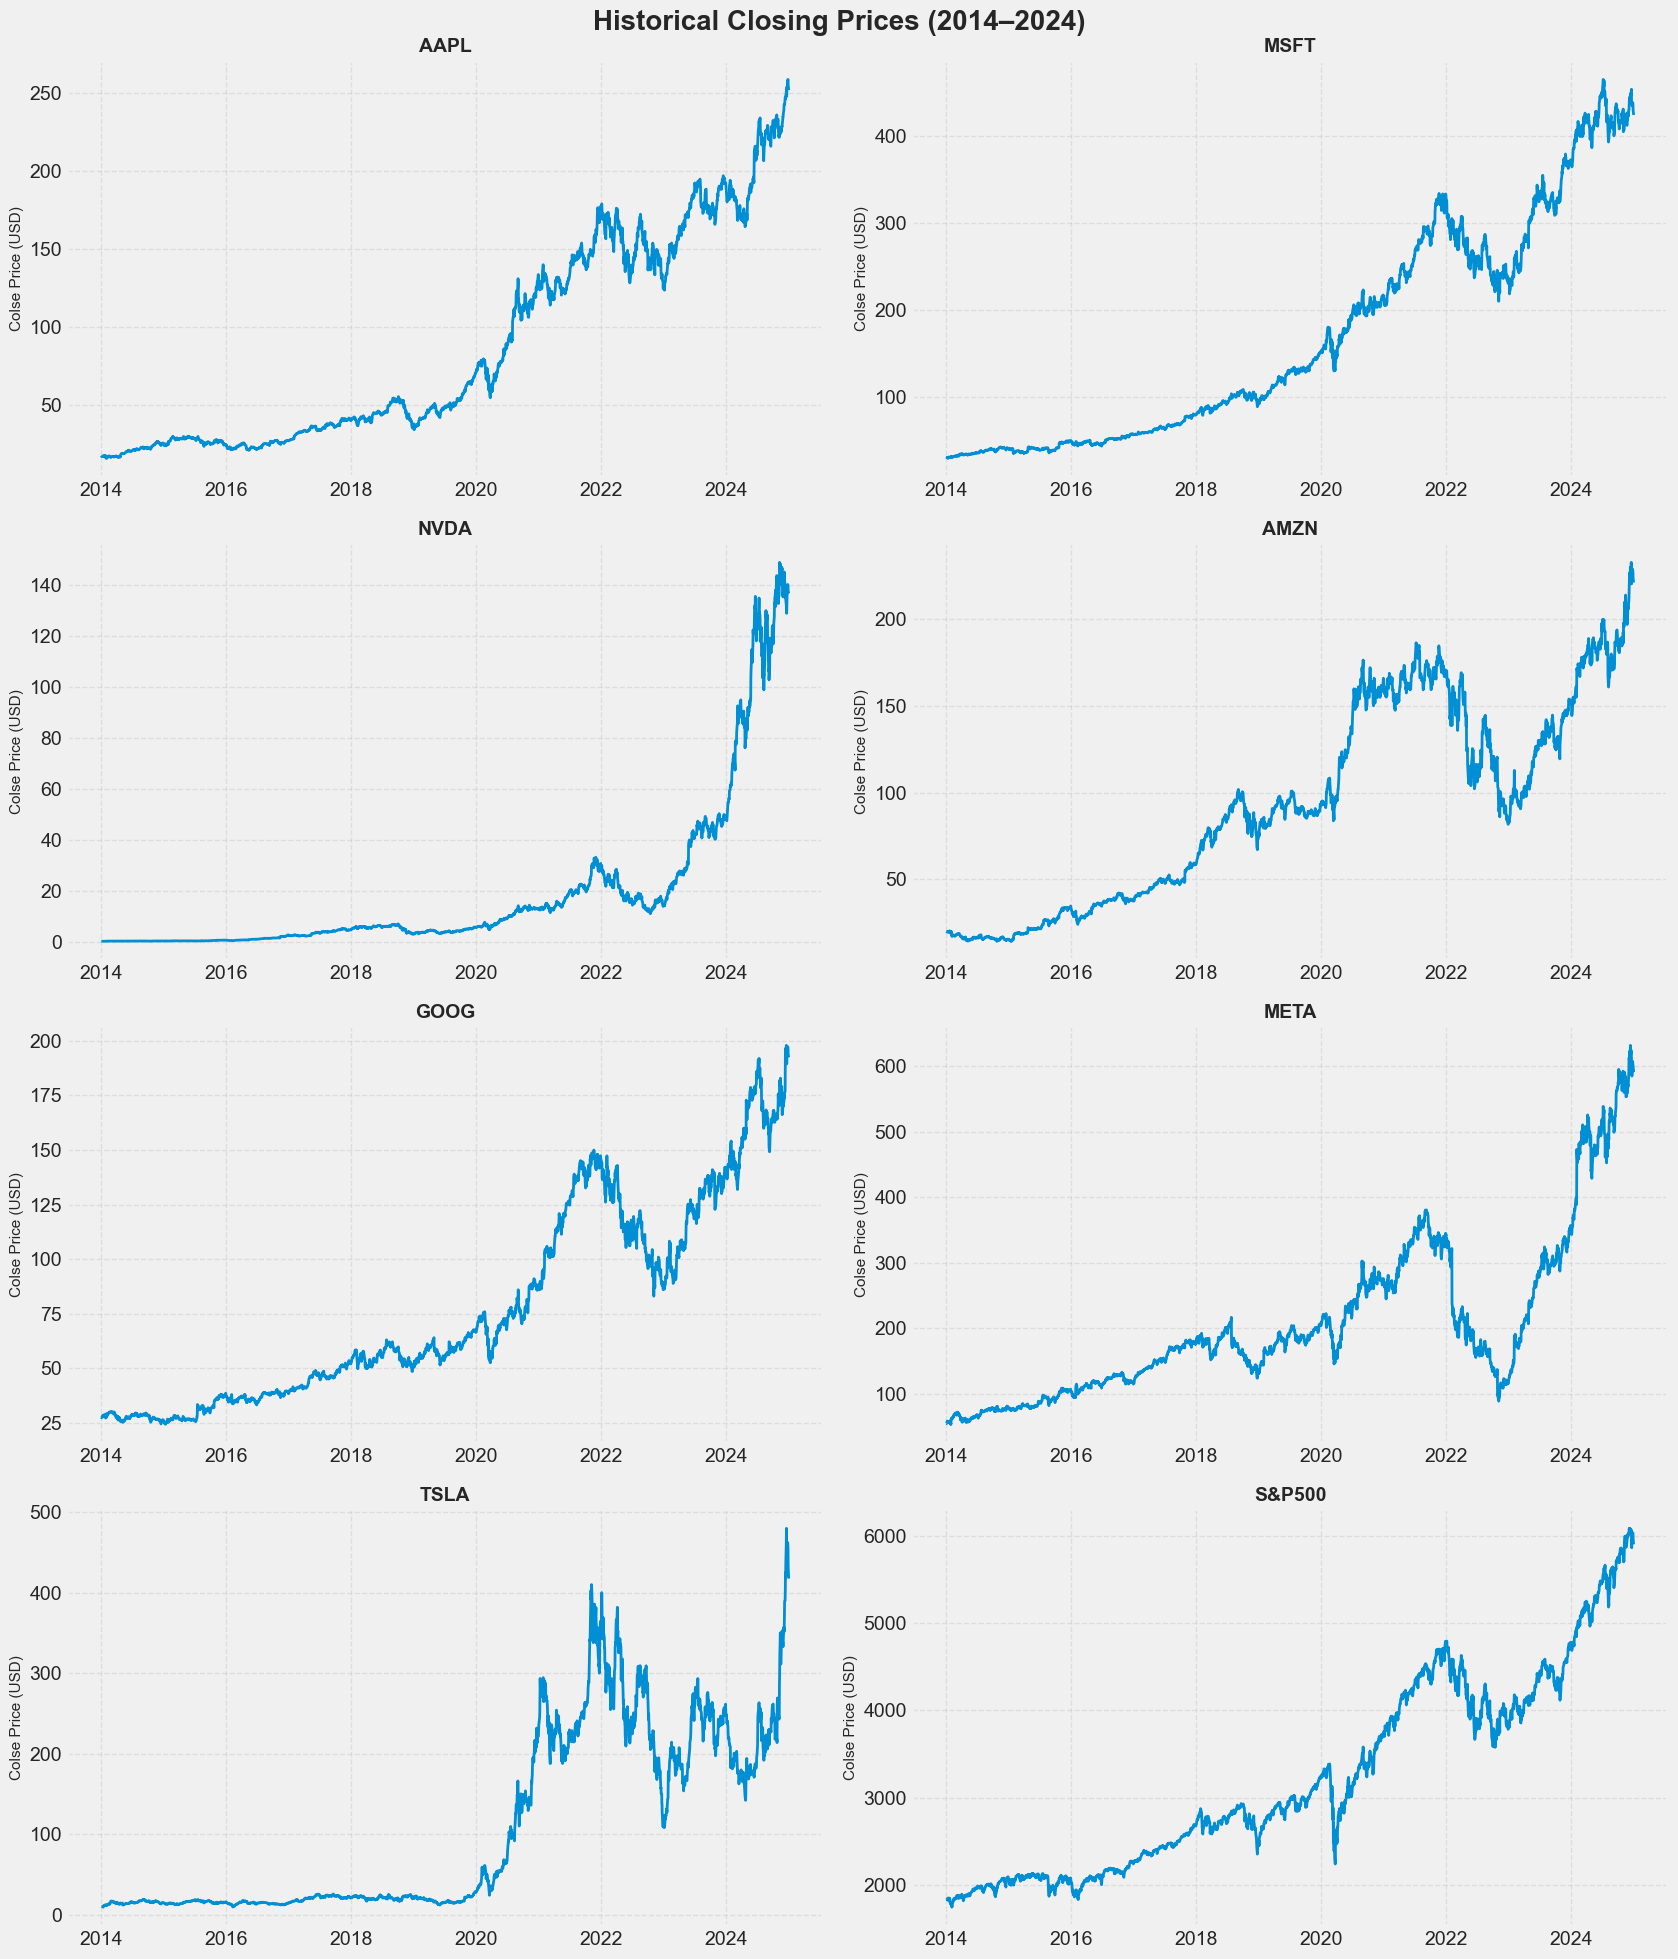

In [66]:
# Historical view of the closing price
stock_names = ['AAPL', 'MSFT', 'NVDA', 'AMZN', 'GOOG', 'META', 'TSLA', 'S&P500']
list_stocks = [aapl, msft, nvda, amzn, goog, meta, tsla, sp500]

plt.figure(figsize=(17, 20))
plt.suptitle('Historical Closing Prices (2014–2024)', fontsize=20, fontweight='bold')
plt.subplots_adjust(hspace=0.4)

for i, (df, name) in enumerate(zip(list_stocks, stock_names), 1):
    plt.subplot(4, 2, i)
    plt.plot(df['Close'], linewidth=2)
    plt.title(f'{name}', fontsize=14, fontweight='bold')
    plt.ylabel('Colse Price (USD)', fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Moving average of the various stocks

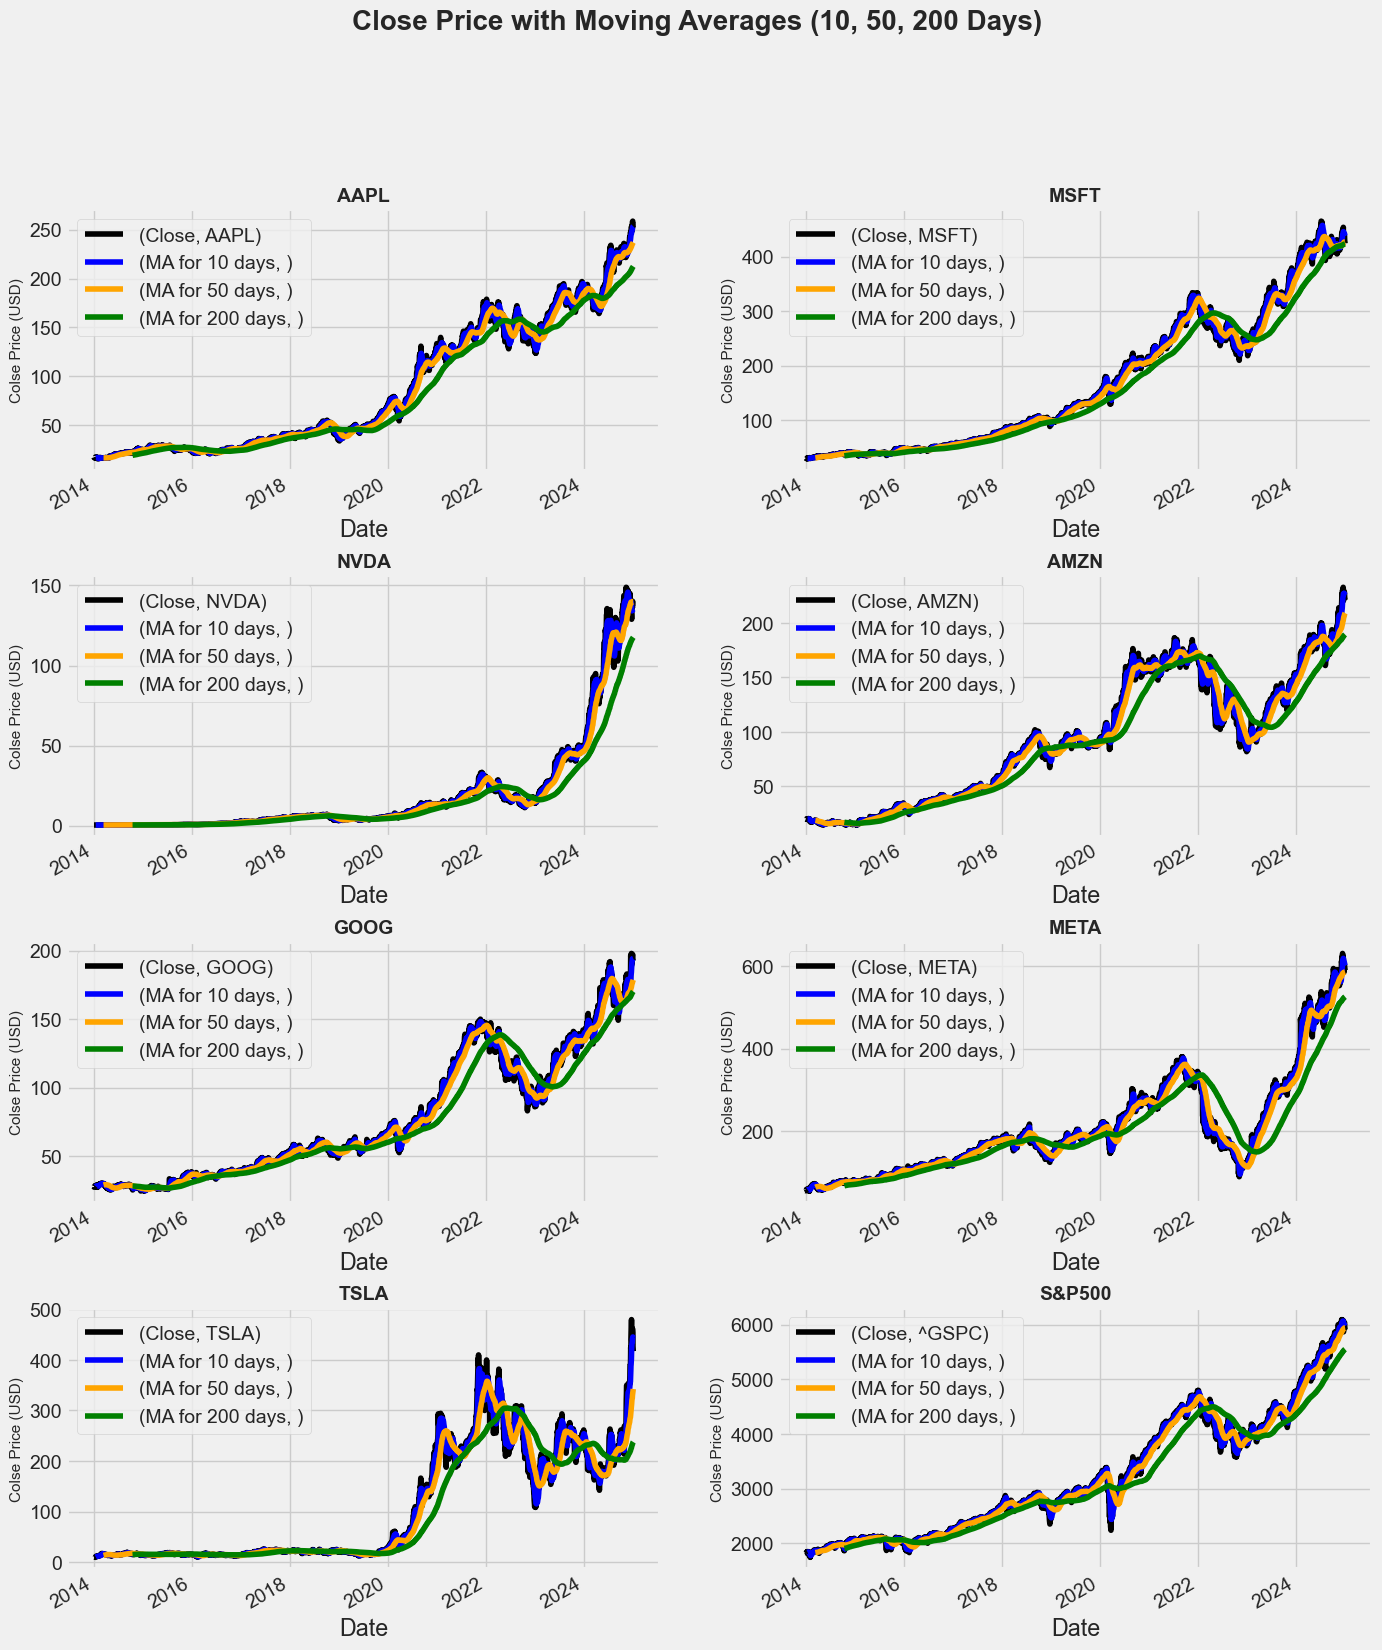

In [68]:
list_stocks = [aapl, msft, nvda, amzn, goog, meta, tsla, sp500]
stock_names = ['AAPL', 'MSFT', 'NVDA', 'AMZN', 'GOOG', 'META', 'TSLA', 'S&P500']
colors = ['black', 'blue', 'orange', 'green'] 

# Cal Moving Averages
ma_days = [10, 50, 200]
for company in list_stocks:
    for ma in ma_days:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(window=ma).mean()

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.suptitle('Close Price with Moving Averages (10, 50, 200 Days)', fontsize=20, fontweight='bold')
fig.subplots_adjust(hspace=0.4, wspace=0.2)

# Plot graph
for ax, company, name in zip(axes.flat, list_stocks, stock_names):
    company[['Close', 'MA for 10 days', 'MA for 50 days', 'MA for 200 days']].plot(ax=ax, color=colors)
    ax.set_title(name, fontsize=14, fontweight='bold')
    ax.set_ylabel('Colse Price (USD)', fontsize=11)
    ax.legend(loc='upper left', fontsize=14)
    ax.grid(True)
plt.show()

In [69]:
aapl

Price,Close,High,Low,Open,Volume,MA for 10 days,MA for 50 days,MA for 200 days
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,
2014-01-02,17.215364,17.336747,17.180818,17.294730,234684800,NaN,NaN,NaN
2014-01-03,16.837221,17.233112,16.820102,17.206969,392467600,NaN,NaN,NaN
2014-01-06,16.929035,17.018359,16.607529,16.727355,412610800,NaN,NaN,NaN
2014-01-07,16.807962,16.992213,16.741981,16.941171,317209200,NaN,NaN,NaN
2014-01-08,16.914404,16.979762,16.765945,16.769678,258529600,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800,249.972160,235.021529,210.752679
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700,251.014017,235.564016,211.182571


## Predicting the closing price stock price using LSTM 😈

In [71]:
start_date = '2014-01-01'
end_date = '2024-12-31'

aapl_df = yf.download('AAPL', start=start_date, end=end_date)
msft_df = yf.download('MSFT', start=start_date, end=end_date)  
nvda_df = yf.download('NVDA', start=start_date, end=end_date)   
amzn_df = yf.download('AMZN', start=start_date, end=end_date)
goog_df = yf.download('GOOG', start=start_date, end=end_date)
meta_df = yf.download('META', start=start_date, end=end_date)
tsla_df = yf.download('TSLA', start=start_date, end=end_date) 
sp500_df = yf.download('^GSPC', start=start_date, end=end_date)

print('\n✅ Getting info for stocks complete!')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


✅ Getting info for stocks complete!


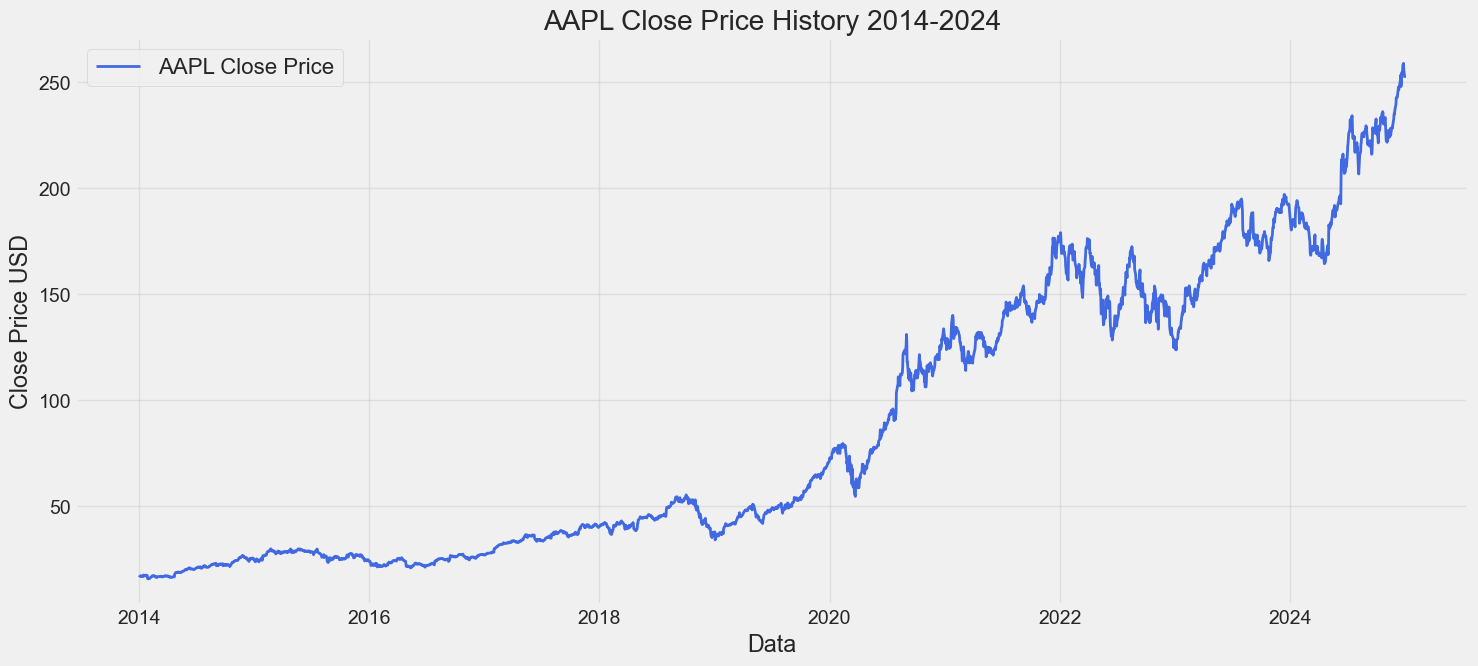

In [72]:
plt.figure(figsize=(16,7))
plt.title('AAPL Close Price History 2014-2024')
plt.plot(aapl_df['Close'], color='royalblue', linewidth=2, label='AAPL Close Price')
plt.legend(fontsize=16)
plt.grid(True, alpha=0.5)
plt.xlabel('Data')
plt.ylabel('Close Price USD')
plt.show()

### Model - AAPL Price Prediction (Train set 90%)

In [74]:
# Create a new dataframe with only the 'Close column'
data = aapl_df['Close']
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset)*0.9))

print(f"Total amount of data : {len(dataset)} Rows")
print(f"Amount of data for training set (90%) : {training_data_len} Rows")

Total amount of data : 2767 Rows
Amount of data for training set (90%) : 2491 Rows


In [75]:
data

Ticker,AAPL
Date,
2014-01-02,17.215364
2014-01-03,16.837221
2014-01-06,16.929035
2014-01-07,16.807962
2014-01-08,16.914404
...,...
2024-12-23,254.989655
2024-12-24,257.916443
2024-12-26,258.735504


In [76]:
dataset # train the model

array([[ 17.21536446],
       [ 16.83722115],
       [ 16.92903519],
       ...,
       [258.73550415],
       [255.30929565],
       [251.92301941]])

In [77]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00682801],
       [0.00527302],
       [0.00565057],
       ...,
       [1.        ],
       [0.98591085],
       [0.9719859 ]])

In [78]:
# Create the training data set 
train_data = scaled_data[0:int(training_data_len), :] # train_data = 2491 Rows from 'scaled_data'

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(f'x_train : {x_train}')
        print(f'y_train : {y_train}')
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

x_train : [array([0.00682801, 0.00527302, 0.00565057, 0.0051527 , 0.00559041,
       0.00470219, 0.00424399, 0.00460108, 0.00596538, 0.00736938,
       0.00697138, 0.00523332, 0.00630838, 0.00662068, 0.00721839,
       0.00592443, 0.00649139, 0.00086006, 0.00012415, 0.        ,
       0.00010496, 0.00022398, 0.00115315, 0.0016395 , 0.0020219 ,
       0.00294503, 0.00414371, 0.00504112, 0.00503596, 0.00613164,
       0.00607499, 0.00633249, 0.00522265, 0.00442184, 0.00366216,
       0.00395832, 0.00325148, 0.00264503, 0.00397375, 0.00378966,
       0.00398534, 0.00443342, 0.00457761, 0.00437029, 0.00433044,
       0.0043922 , 0.00505787, 0.00512479, 0.00435746, 0.00359009,
       0.00385402, 0.004454  , 0.00443598, 0.00410638, 0.00464323,
       0.005457  , 0.00620373, 0.00553297, 0.00523425, 0.00515698])]
y_train : [0.005141546493386939]

x_train : [array([0.00682801, 0.00527302, 0.00565057, 0.0051527 , 0.00559041,
       0.00470219, 0.00424399, 0.00460108, 0.00596538, 0.00736938,
    

(2431, 60, 1)

In [79]:
print(train_data.shape)
train_data

(2491, 1)


array([[0.00682801],
       [0.00527302],
       [0.00565057],
       ...,
       [0.71861205],
       [0.71530109],
       [0.7180398 ]])

In [80]:
from keras.models import Sequential
from keras.layers import Dense , LSTM

# Build the LSTM model
model_LSTM = Sequential()
model_LSTM.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_LSTM.add(LSTM(64, return_sequences=False))
model_LSTM.add(Dense(25))
model_LSTM.add(Dense(1))

# Compile the model
model_LSTM.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_LSTM.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2431/2431 ━━━━━━━━━━━━━━━━━━━━ 43s 16ms/step - loss: 0.0020
Epoch 2/5
2431/2431 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - loss: 3.8899e-04
Epoch 3/5
2431/2431 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - loss: 2.6530e-04
Epoch 4/5
2431/2431 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - loss: 1.8703e-04
Epoch 5/5
2431/2431 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - loss: 1.9221e-04


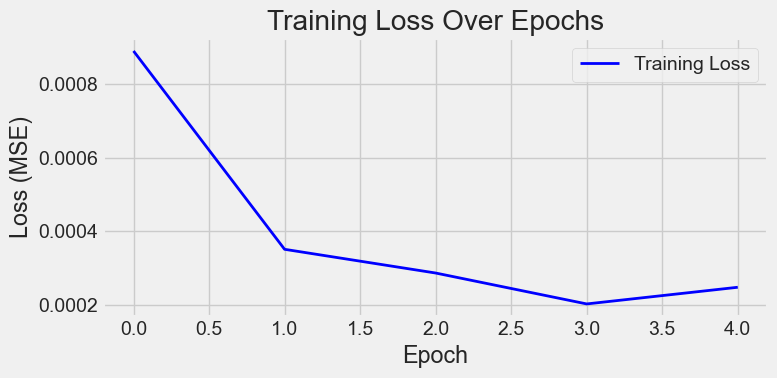

In [81]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [82]:
# Create the testing data set and new array containing scaled values 
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test) # Convert the data to a numpy array
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 )) # Reshape the data

# Get the models predicted price values 
predictions = model_LSTM.predict(x_test)
predictions = scaler.inverse_transform(predictions) # Convert from scaled values back to real prices (inverse transform)

########################################################################################################################
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
accuracy = 100 - np.mean(np.abs((predictions - y_test) / y_test)) * 100 # Approximate

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Approx. Accuracy: {accuracy:.2f}%")

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
MAE: 8.4872
RMSE: 8.8942
R² Score: 0.8703
Approx. Accuracy: 95.81%


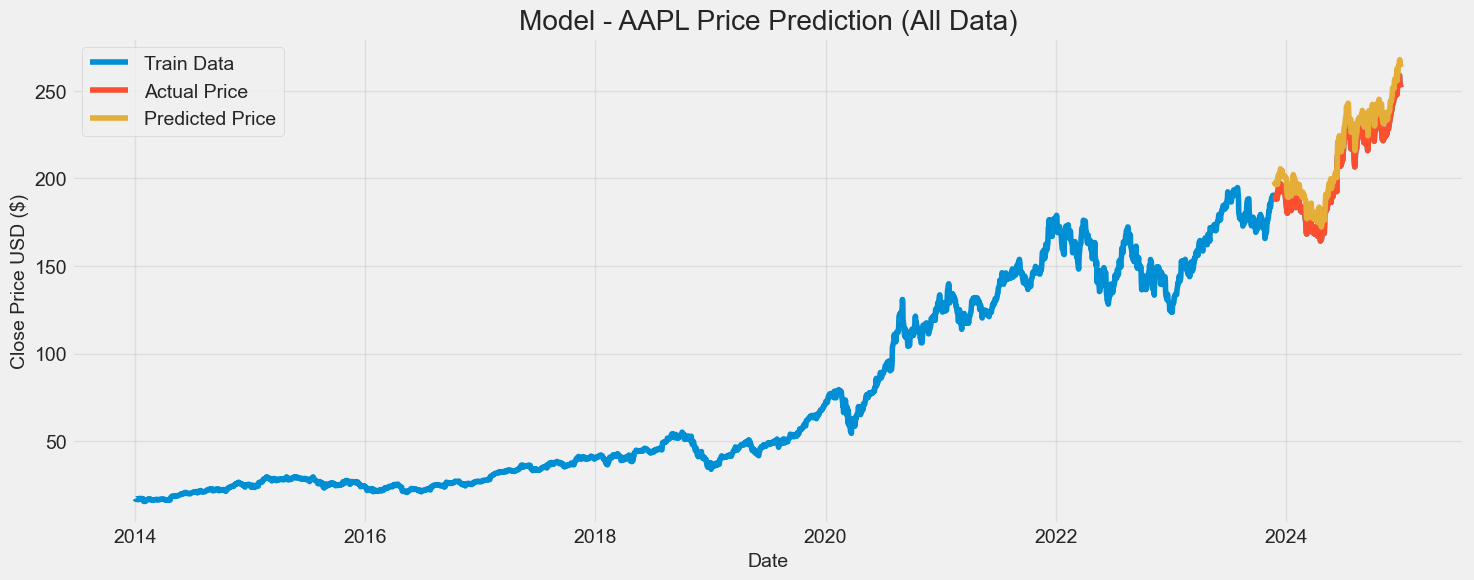

In [83]:
# Plot the data
valid = aapl_df[training_data_len:].copy()  
valid.loc[:, 'Predictions'] = predictions 

# Visualize the data
# Model - AAPL Price Prediction (All Data)
plt.figure(figsize=(16, 6))
plt.title('Model - AAPL Price Prediction (All Data)')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.plot(aapl_df['Close'], label='Actual Price') 
plt.plot(valid[['Close', 'Predictions']], linestyle='-') 
plt.legend(['Train Data', 'Actual Price', 'Predicted Price'])
plt.grid(True, alpha=0.5)
plt.show()

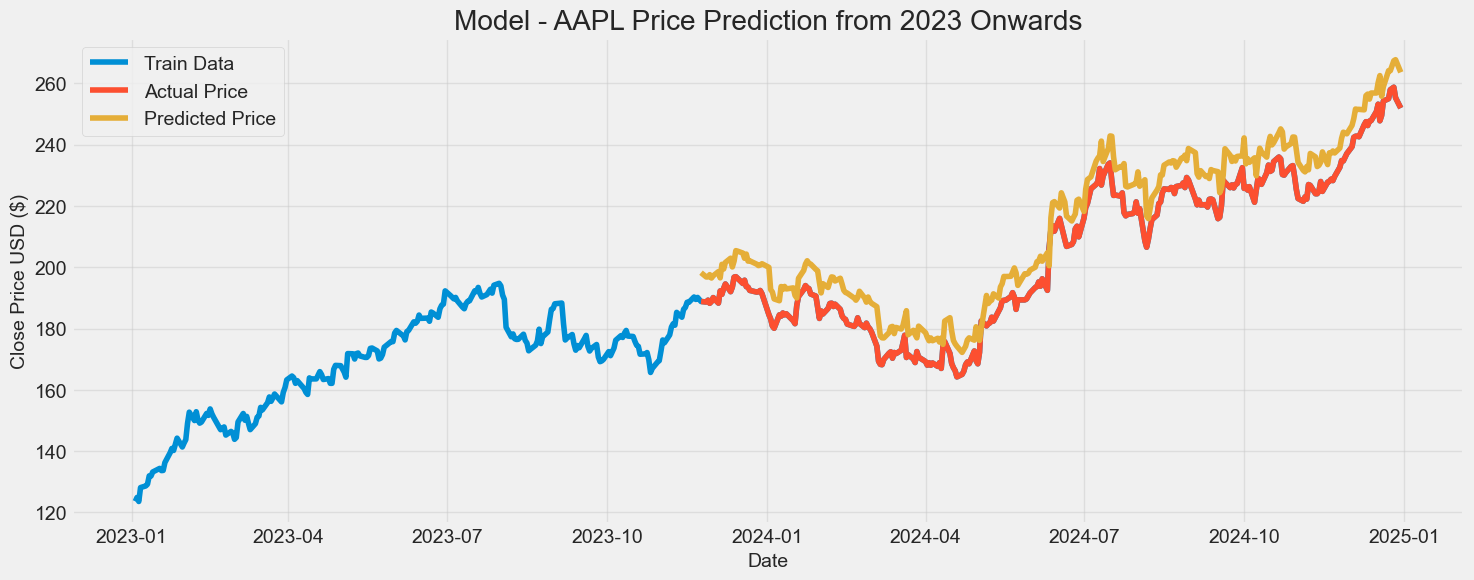

In [84]:
# Model - AAPL Price Prediction from 2023
aapl_df_2023 = aapl_df.loc['2023-01-01':] 
valid_2023 = valid.loc['2023-01-01':]

plt.figure(figsize=(16, 6))
plt.plot(aapl_df_2023['Close'], label='Actual Price')
plt.plot(valid_2023[['Close', 'Predictions']], linestyle='-')  
plt.legend(['Train Data', 'Actual Price', 'Predicted Price'])

plt.title('Model - AAPL Price Prediction from 2023 Onwards')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.grid(True, alpha=0.5)
plt.show()

In [85]:
valid_2023[['Close','Predictions']]

Price,Close,Predictions
Ticker,AAPL,
Date,,
2023-11-24,188.836243,198.231659
2023-11-27,188.657318,196.833069
2023-11-28,189.263672,196.837128
2023-11-29,188.239822,197.587357
2023-11-30,188.816345,196.482941
...,...,...
2024-12-23,254.989655,264.129517
2024-12-24,257.916443,264.123199


### Model - NVDA Price Prediction (Train set 70%)

Total amount of data : 2767 Rows
Amount of data for training set (70%) : 1937 Rows
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1877/1877 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - loss: 7.7566e-05
Epoch 2/5
1877/1877 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - loss: 2.8235e-05
Epoch 3/5
1877/1877 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - loss: 2.2442e-05
Epoch 4/5
1877/1877 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - loss: 9.6367e-06
Epoch 5/5
1877/1877 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - loss: 1.1493e-05
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
MAE: 1.4772
RMSE: 2.2395
R² Score: 0.9970
Approx. Accuracy: 96.59%


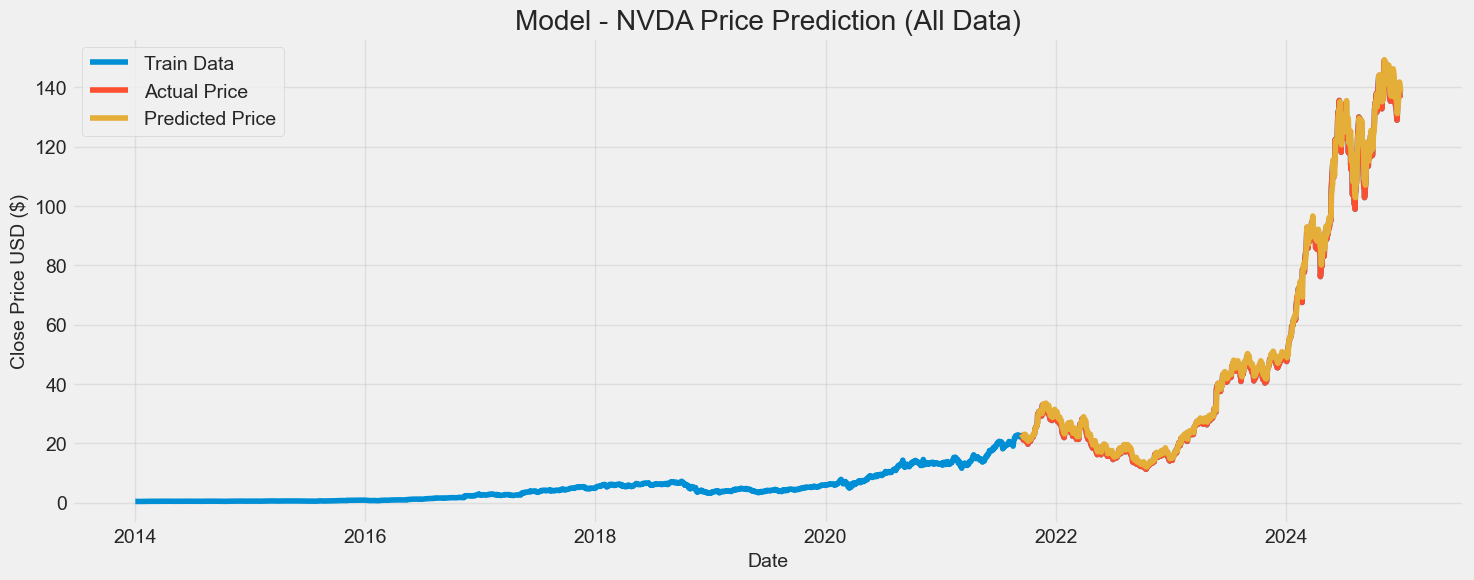

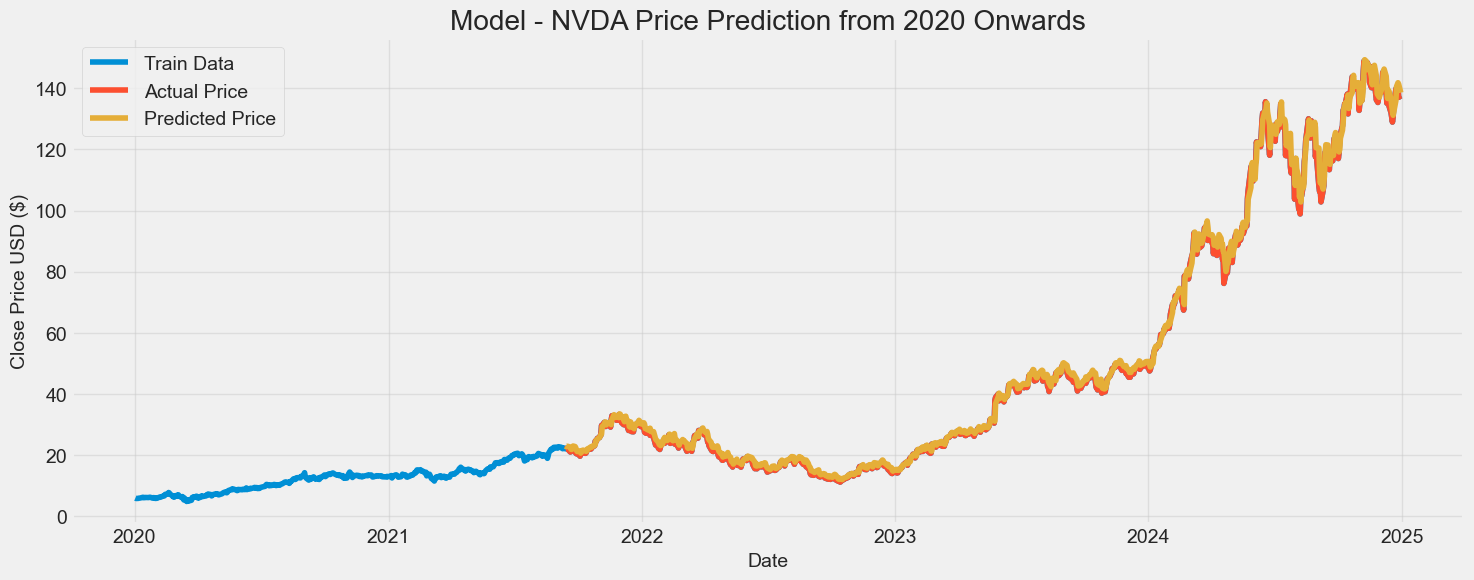

In [87]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense , LSTM
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

data = nvda_df['Close']
dataset = data.values
training_data_len = int(np.ceil(len(dataset)*0.7))
print(f"Total amount of data : {len(dataset)} Rows")
print(f"Amount of data for training set (70%) : {training_data_len} Rows")

# Scale data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set 
train_data = scaled_data[0:int(training_data_len), :] 

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
        
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model_LSTM = Sequential()
model_LSTM.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_LSTM.add(LSTM(64, return_sequences=False))
model_LSTM.add(Dense(25))
model_LSTM.add(Dense(1))
model_LSTM.compile(optimizer='adam', loss='mean_squared_error') # Compile the model
model_LSTM.fit(x_train, y_train, batch_size=1, epochs=5) # Train the model

test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model_LSTM.predict(x_test)
predictions = scaler.inverse_transform(predictions)

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
accuracy = 100 - np.mean(np.abs((predictions - y_test) / y_test)) * 100 # Approximate

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Approx. Accuracy: {accuracy:.2f}%")

#####################################################################################
# Plot the data
valid = nvda_df[training_data_len:].copy()  
valid.loc[:, 'Predictions'] = predictions 

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Model - NVDA Price Prediction (All Data)')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.plot(nvda_df['Close'], label='Actual Price') 
plt.plot(valid[['Close', 'Predictions']], linestyle='-') 
plt.legend(['Train Data', 'Actual Price', 'Predicted Price'])
plt.grid(True, alpha=0.5)
plt.show()
#####################################################################################
nvda_df_2020 = nvda_df.loc['2020-01-01':] 
nvda_valid_2020 = valid.loc['2020-01-01':]

plt.figure(figsize=(16, 6))
plt.plot(nvda_df_2020['Close'], label='Actual Price')
plt.plot(nvda_valid_2020[['Close', 'Predictions']], linestyle='-')  
plt.legend(['Train Data', 'Actual Price', 'Predicted Price'])
plt.title('Model - NVDA Price Prediction from 2020 Onwards')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.grid(True, alpha=0.5)
plt.show()

In [88]:
nvda_valid_2020[['Close','Predictions']]

Price,Close,Predictions
Ticker,NVDA,
Date,,
2021-09-13,22.110477,22.980995
2021-09-14,22.200310,22.820698
2021-09-15,22.299124,22.841146
2021-09-16,22.200310,22.937279
2021-09-17,21.858952,22.891205
...,...,...
2024-12-23,139.657150,135.942780
2024-12-24,140.207108,140.585617


### Model predictions for the next 4 years 🤩

In [93]:
from datetime import datetime
start_data_frist = '1999-01-22'
end_date_now = datetime.now()

nvda_all_data = yf.download("NVDA", start=start_data_frist, end=end_date_now)

print('\n✅ Getting info for stocks complete!')
nvda_all_data

[*********************100%***********************]  1 of 1 completed


✅ Getting info for stocks complete!


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
1999-01-22,0.037612,0.044775,0.035581,0.040119,2714688000
1999-01-25,0.041552,0.042029,0.037612,0.040597,510480000
1999-01-26,0.038328,0.042865,0.037731,0.042029,343200000
1999-01-27,0.038209,0.039403,0.036298,0.038447,244368000
1999-01-28,0.038089,0.038447,0.037850,0.038209,227520000
...,...,...,...,...,...
2025-04-09,114.330002,115.099998,97.529999,98.889999,612918300
2025-04-10,107.570000,110.860001,99.150002,109.370003,437812400


In [95]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense , LSTM
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [ ]:
dataset = nvda_all_data['Close'].values
training_data_len = int(len(dataset))  # Use all data for training

# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset.reshape(-1, 1))
training_data = scaled_data

# 1. Create training sequences (x_train, y_train)
x_train = []
y_train = []

for i in range(60, len(training_data)):
    x_train.append(training_data[i-60:i, 0])  # 60-day history
    y_train.append(training_data[i, 0])       # Next-day prediction

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape input to be 3D [samples, time_steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# 2. Build and Train the Model
model_LSTM = Sequential()
model_LSTM.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_LSTM.add(LSTM(64, return_sequences=False))
model_LSTM.add(Dense(25))
model_LSTM.add(Dense(1))
model_LSTM.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_LSTM.fit(x_train, y_train, batch_size=1, epochs=3)
print('\n✅ Train the model complete!')

# 3.Predict the Next 4 Years (Forward Loop)
import datetime

days_to_predict = 365 * 4  # 4 years of daily predictions
predicted_prices = []

# Use the last 60 days of data as the seed
last_60_days = training_data[-60:].flatten().tolist()

for _ in range(days_to_predict):
    current_input = np.array(last_60_days[-60:]).reshape(1, 60, 1)
    predicted_scaled = model_LSTM.predict(current_input, verbose=0)
    
    # Save prediction and append for next round
    predicted_prices.append(predicted_scaled[0, 0])
    last_60_days.append(predicted_scaled[0, 0])

predicted_prices_actual = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

#  5. Plot Future Prices
# Create future date range
last_date = nvda_all_data.index[-1]
future_dates = [last_date + datetime.timedelta(days=i+1) for i in range(days_to_predict)]

# Plot
plt.figure(figsize=(16,6))
plt.plot(nvda_all_data['Close'], label="Historical Data")
plt.plot(future_dates, predicted_prices_actual, label="Predicted Future (4 years)", linestyle="-")
plt.xlabel("Date")
plt.ylabel("Close Price USD ($)")
plt.title("NVDA - Price Forecast for Next 4 Years")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
6539/6539 ━━━━━━━━━━━━━━━━━━━━ 110s 16ms/step - loss: 0.0016
Epoch 2/3
6539/6539 ━━━━━━━━━━━━━━━━━━━━ 130s 20ms/step - loss: 4.7343e-04
Epoch 3/3
6539/6539 ━━━━━━━━━━━━━━━━━━━━ 123s 19ms/step - loss: 3.1173e-04

✅ Train the model complete!


In [ ]:
predicted_prices_actual